### Troubleshoot code

In [9]:
import pandas as pd, numpy as np, time
from sklearn.model_selection import train_test_split

data = pd.read_csv("d:/data/flights.csv")
data = data.sample(frac = 0.1, random_state=10)

data = data[["MONTH","DAY","DAY_OF_WEEK","AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT","AIR_TIME", "DEPARTURE_TIME","DISTANCE","ARRIVAL_DELAY"]]
data.dropna(inplace=True)

data["ARRIVAL_DELAY"] = (data["ARRIVAL_DELAY"]>10)*1

cols = ["AIRLINE","FLIGHT_NUMBER","DESTINATION_AIRPORT","ORIGIN_AIRPORT"]
for item in cols:
    data[item] = data[item].astype("category").cat.codes +1
 
train, test, y_train, y_test = train_test_split(data.drop(["ARRIVAL_DELAY"], axis=1), data["ARRIVAL_DELAY"],
                                                random_state=10, test_size=0.25)


C:\Users\aicyb\AppData\Local\Temp\ipykernel_6148\831581095.py:4: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("d:/data/flights.csv")


In [ ]:
import xgboost as xgb
from sklearn import metrics

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

# Parameter Tuning
model = xgb.XGBClassifier()
param_dist = {"max_depth": [10,30,50],
              "min_child_weight" : [1,3,6],
              "n_estimators": [200],
              "learning_rate": [0.05, 0.1,0.16],}
grid_search = GridSearchCV(model, param_grid=param_dist, cv = 3, 
                                   verbose=10, n_jobs=-1)
grid_search.fit(train, y_train)

grid_search.best_estimator_

model = xgb.XGBClassifier(max_depth=50, min_child_weight=1,  n_estimators=200,\
                          n_jobs=-1 , verbose=1,learning_rate=0.16)
model.fit(train,y_train)

auc(model, train, test)

In [ ]:
import lightgbm as lgb
from sklearn import metrics

def auc2(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict(train)),
                            metrics.roc_auc_score(y_test,m.predict(test)))

lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 3, scoring="roc_auc", verbose=5)
grid_search.fit(train,y_train)
grid_search.best_estimator_

d_train = lgb.Dataset(train, label=y_train)
params = {"max_depth": 50, "learning_rate" : 0.1, "num_leaves": 900,  "n_estimators": 300}

# Without Categorical Features
model2 = lgb.train(params, d_train)
auc2(model2, train, test)

#With Catgeorical Features
cate_features_name = ["MONTH","DAY","DAY_OF_WEEK","AIRLINE","DESTINATION_AIRPORT",
                 "ORIGIN_AIRPORT"]
model2 = lgb.train(params, d_train, categorical_feature = cate_features_name)
auc2(model2, train, test)

In [ ]:
import catboost as cb
cat_features_index = [0,1,2,3,4,5,6]

def auc(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(test)[:,1]))

params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [300]}
cb = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring="roc_auc", cv = 3)
cb_model.fit(train, y_train)

With Categorical features
clf = cb.CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(train,y_train)
auc(clf, train, test)

With Categorical features
clf = cb.CatBoostClassifier(eval_metric="AUC",one_hot_max_size=31, \
                            depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(train,y_train, cat_features= cat_features_index)
auc(clf, train, test)

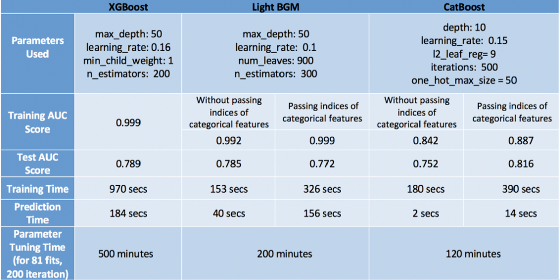

In [1]:
################################################################################################################################

### CatBoost Regression

In [ ]:
pip install catboost

In [2]:
import catboost as cb
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance
boston = datasets.load_boston()
boston = pd.DataFrame(boston.data, columns=boston.feature_names)

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

C:\Users\aicyb\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [4]:
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [5]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [6]:
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

0:	learn: 23.9109759	test: 23.3747443	best: 23.3747443 (0)	total: 142ms	remaining: 14.1s
1:	learn: 23.2999199	test: 22.7526895	best: 22.7526895 (1)	total: 143ms	remaining: 7.01s
2:	learn: 22.7063969	test: 22.1298297	best: 22.1298297 (2)	total: 143ms	remaining: 4.64s
3:	learn: 22.0904045	test: 21.4745540	best: 21.4745540 (3)	total: 144ms	remaining: 3.45s
4:	learn: 21.4975439	test: 20.8393774	best: 20.8393774 (4)	total: 144ms	remaining: 2.73s
5:	learn: 20.9159902	test: 20.2166454	best: 20.2166454 (5)	total: 144ms	remaining: 2.26s
6:	learn: 20.3631449	test: 19.6240476	best: 19.6240476 (6)	total: 144ms	remaining: 1.92s
7:	learn: 19.8277044	test: 19.0775839	best: 19.0775839 (7)	total: 145ms	remaining: 1.66s
8:	learn: 19.3258935	test: 18.5427044	best: 18.5427044 (8)	total: 145ms	remaining: 1.46s
9:	learn: 18.8503317	test: 18.0213829	best: 18.0213829 (9)	total: 145ms	remaining: 1.3s
10:	learn: 18.3857863	test: 17.5312836	best: 17.5312836 (10)	total: 145ms	remaining: 1.18s
11:	learn: 17.941350

20:	learn: 6.1573888	test: 4.2253333	best: 4.2253333 (20)	total: 6.33ms	remaining: 23.8ms
21:	learn: 5.9728086	test: 3.9856568	best: 3.9856568 (21)	total: 6.75ms	remaining: 23.9ms
22:	learn: 5.7760763	test: 3.8112432	best: 3.8112432 (22)	total: 7.02ms	remaining: 23.5ms
23:	learn: 5.6164435	test: 3.6846486	best: 3.6846486 (23)	total: 7.63ms	remaining: 24.2ms
24:	learn: 5.5138053	test: 3.5692121	best: 3.5692121 (24)	total: 7.88ms	remaining: 23.6ms
25:	learn: 5.3737533	test: 3.4429514	best: 3.4429514 (25)	total: 8.13ms	remaining: 23.1ms
26:	learn: 5.1922821	test: 3.3653152	best: 3.3653152 (26)	total: 8.36ms	remaining: 22.6ms
27:	learn: 5.0678996	test: 3.2797917	best: 3.2797917 (27)	total: 8.58ms	remaining: 22.1ms
28:	learn: 4.9543435	test: 3.2213221	best: 3.2213221 (28)	total: 8.8ms	remaining: 21.6ms
29:	learn: 4.8266556	test: 3.1644581	best: 3.1644581 (29)	total: 9.03ms	remaining: 21.1ms
30:	learn: 4.7361204	test: 3.1019431	best: 3.1019431 (30)	total: 9.26ms	remaining: 20.6ms
31:	learn: 

27:	learn: 12.3753452	test: 11.0489499	best: 11.0489499 (27)	total: 8.43ms	remaining: 36.7ms
28:	learn: 12.1008039	test: 10.7517995	best: 10.7517995 (28)	total: 9.03ms	remaining: 37.7ms
29:	learn: 11.8157309	test: 10.4438555	best: 10.4438555 (29)	total: 9.3ms	remaining: 37.2ms
30:	learn: 11.5910605	test: 10.2030683	best: 10.2030683 (30)	total: 9.54ms	remaining: 36.6ms
31:	learn: 11.3481422	test: 9.9295105	best: 9.9295105 (31)	total: 9.79ms	remaining: 36.1ms
32:	learn: 11.0917185	test: 9.6503978	best: 9.6503978 (32)	total: 10ms	remaining: 35.5ms
33:	learn: 10.8556269	test: 9.3812187	best: 9.3812187 (33)	total: 10.3ms	remaining: 35ms
34:	learn: 10.6513740	test: 9.1551008	best: 9.1551008 (34)	total: 10.5ms	remaining: 34.5ms
35:	learn: 10.4370645	test: 8.9138761	best: 8.9138761 (35)	total: 10.8ms	remaining: 34.1ms
36:	learn: 10.2216882	test: 8.6996347	best: 8.6996347 (36)	total: 11ms	remaining: 33.6ms
37:	learn: 10.0115343	test: 8.4895327	best: 8.4895327 (37)	total: 11.2ms	remaining: 33.1m

90:	learn: 4.9085979	test: 3.1336991	best: 3.1336991 (90)	total: 29.3ms	remaining: 35.1ms
91:	learn: 4.8648262	test: 3.1084917	best: 3.1084917 (91)	total: 29.8ms	remaining: 35ms
92:	learn: 4.8315531	test: 3.0908012	best: 3.0908012 (92)	total: 30ms	remaining: 34.5ms
93:	learn: 4.7925744	test: 3.0649383	best: 3.0649383 (93)	total: 30.3ms	remaining: 34.1ms
94:	learn: 4.7521441	test: 3.0511697	best: 3.0511697 (94)	total: 30.5ms	remaining: 33.7ms
95:	learn: 4.7204026	test: 3.0194961	best: 3.0194961 (95)	total: 30.7ms	remaining: 33.3ms
96:	learn: 4.6750670	test: 2.9987967	best: 2.9987967 (96)	total: 31ms	remaining: 32.9ms
97:	learn: 4.6522863	test: 2.9710308	best: 2.9710308 (97)	total: 31.2ms	remaining: 32.5ms
98:	learn: 4.6165834	test: 2.9601703	best: 2.9601703 (98)	total: 31.5ms	remaining: 32.1ms
99:	learn: 4.5875942	test: 2.9286051	best: 2.9286051 (99)	total: 31.7ms	remaining: 31.7ms
100:	learn: 4.5657813	test: 2.9077249	best: 2.9077249 (100)	total: 31.9ms	remaining: 31.3ms
101:	learn: 4.

129:	learn: 2.3893632	test: 2.4083466	best: 2.4083466 (129)	total: 37.9ms	remaining: 20.4ms
130:	learn: 2.3804838	test: 2.4028672	best: 2.4028672 (130)	total: 38.3ms	remaining: 20.2ms
131:	learn: 2.3723766	test: 2.4028632	best: 2.4028632 (131)	total: 38.6ms	remaining: 19.9ms
132:	learn: 2.3681017	test: 2.3942179	best: 2.3942179 (132)	total: 39ms	remaining: 19.6ms
133:	learn: 2.3652025	test: 2.3982348	best: 2.3942179 (132)	total: 39.3ms	remaining: 19.3ms
134:	learn: 2.3573225	test: 2.3978514	best: 2.3942179 (132)	total: 39.5ms	remaining: 19ms
135:	learn: 2.3532141	test: 2.3955752	best: 2.3942179 (132)	total: 39.8ms	remaining: 18.7ms
136:	learn: 2.3477192	test: 2.3929439	best: 2.3929439 (136)	total: 40ms	remaining: 18.4ms
137:	learn: 2.3356840	test: 2.3809961	best: 2.3809961 (137)	total: 40.2ms	remaining: 18.1ms
138:	learn: 2.3287590	test: 2.3773957	best: 2.3773957 (138)	total: 40.5ms	remaining: 17.8ms
139:	learn: 2.3253184	test: 2.3763417	best: 2.3763417 (139)	total: 40.7ms	remaining: 1

198:	learn: 3.4263449	test: 2.6175494	best: 2.6175494 (198)	total: 53.5ms	remaining: 269us
199:	learn: 3.4208152	test: 2.6166161	best: 2.6166161 (199)	total: 54.1ms	remaining: 0us

bestTest = 2.616616055
bestIteration = 199

22:	loss: 2.6166161	best: 2.3174039 (9)	total: 1.22s	remaining: 3.87s
0:	learn: 22.4682792	test: 21.9116779	best: 21.9116779 (0)	total: 335us	remaining: 66.7ms
1:	learn: 20.6671832	test: 20.0525408	best: 20.0525408 (1)	total: 614us	remaining: 60.9ms
2:	learn: 18.9466420	test: 18.3061364	best: 18.3061364 (2)	total: 870us	remaining: 57.2ms
3:	learn: 17.3567012	test: 16.5857280	best: 16.5857280 (3)	total: 1.23ms	remaining: 60.1ms
4:	learn: 15.9551432	test: 15.0609958	best: 15.0609958 (4)	total: 1.51ms	remaining: 59ms
5:	learn: 14.6630922	test: 13.6347787	best: 13.6347787 (5)	total: 1.76ms	remaining: 56.9ms
6:	learn: 13.5326389	test: 12.4227887	best: 12.4227887 (6)	total: 2.02ms	remaining: 55.6ms
7:	learn: 12.5178291	test: 11.3542085	best: 11.3542085 (7)	total: 2.26ms	

14:	learn: 16.5003400	test: 15.6086768	best: 15.6086768 (14)	total: 10.3ms	remaining: 58.5ms
15:	learn: 16.0826825	test: 15.1536457	best: 15.1536457 (15)	total: 11ms	remaining: 57.8ms
16:	learn: 15.6714513	test: 14.7136549	best: 14.7136549 (16)	total: 11.5ms	remaining: 56.3ms
17:	learn: 15.2842381	test: 14.2949212	best: 14.2949212 (17)	total: 12ms	remaining: 54.9ms
18:	learn: 14.9038339	test: 13.8955395	best: 13.8955395 (18)	total: 12.5ms	remaining: 53.5ms
19:	learn: 14.5591691	test: 13.5200948	best: 13.5200948 (19)	total: 13ms	remaining: 52ms
20:	learn: 14.1860340	test: 13.1227102	best: 13.1227102 (20)	total: 13.5ms	remaining: 50.6ms
21:	learn: 13.8390407	test: 12.7466710	best: 12.7466710 (21)	total: 13.9ms	remaining: 49.5ms
22:	learn: 13.4959958	test: 12.3977964	best: 12.3977964 (22)	total: 14.4ms	remaining: 48.4ms
23:	learn: 13.1753743	test: 12.0617373	best: 12.0617373 (23)	total: 15ms	remaining: 47.6ms
24:	learn: 12.8518661	test: 11.7233635	best: 11.7233635 (24)	total: 15.5ms	remai

63:	learn: 5.9883955	test: 4.4518925	best: 4.4518925 (63)	total: 42ms	remaining: 23.7ms
64:	learn: 5.9074717	test: 4.3535680	best: 4.3535680 (64)	total: 42.8ms	remaining: 23.1ms
65:	learn: 5.8017360	test: 4.2592793	best: 4.2592793 (65)	total: 43.5ms	remaining: 22.4ms
66:	learn: 5.7233177	test: 4.1684268	best: 4.1684268 (66)	total: 44.1ms	remaining: 21.7ms
67:	learn: 5.6248702	test: 4.0839173	best: 4.0839173 (67)	total: 44.7ms	remaining: 21ms
68:	learn: 5.5398803	test: 3.9981756	best: 3.9981756 (68)	total: 45.2ms	remaining: 20.3ms
69:	learn: 5.4637192	test: 3.9100270	best: 3.9100270 (69)	total: 45.8ms	remaining: 19.6ms
70:	learn: 5.3780302	test: 3.8366731	best: 3.8366731 (70)	total: 46.5ms	remaining: 19ms
71:	learn: 5.3042151	test: 3.7553474	best: 3.7553474 (71)	total: 47.1ms	remaining: 18.3ms
72:	learn: 5.2302100	test: 3.6943982	best: 3.6943982 (72)	total: 47.8ms	remaining: 17.7ms
73:	learn: 5.1637479	test: 3.6220983	best: 3.6220983 (73)	total: 48.4ms	remaining: 17ms
74:	learn: 5.08122

68:	learn: 6.0753837	test: 4.4905461	best: 4.4905461 (68)	total: 70.6ms	remaining: 31.7ms
69:	learn: 6.0019439	test: 4.4229539	best: 4.4229539 (69)	total: 71.6ms	remaining: 30.7ms
70:	learn: 5.9114930	test: 4.3441365	best: 4.3441365 (70)	total: 72.3ms	remaining: 29.5ms
71:	learn: 5.8265271	test: 4.2570410	best: 4.2570410 (71)	total: 72.8ms	remaining: 28.3ms
72:	learn: 5.7453802	test: 4.1836995	best: 4.1836995 (72)	total: 73.4ms	remaining: 27.1ms
73:	learn: 5.6654894	test: 4.0998815	best: 4.0998815 (73)	total: 74ms	remaining: 26ms
74:	learn: 5.5829247	test: 4.0264533	best: 4.0264533 (74)	total: 74.6ms	remaining: 24.9ms
75:	learn: 5.5184544	test: 3.9776039	best: 3.9776039 (75)	total: 75.1ms	remaining: 23.7ms
76:	learn: 5.4567431	test: 3.9174263	best: 3.9174263 (76)	total: 75.6ms	remaining: 22.6ms
77:	learn: 5.3991663	test: 3.8687540	best: 3.8687540 (77)	total: 76.1ms	remaining: 21.5ms
78:	learn: 5.3361340	test: 3.8106603	best: 3.8106603 (78)	total: 76.7ms	remaining: 20.4ms
79:	learn: 5.2

38:	learn: 2.8569007	test: 2.4156576	best: 2.4156576 (38)	total: 21.6ms	remaining: 61.4ms
39:	learn: 2.8264452	test: 2.4139043	best: 2.4139043 (39)	total: 22.4ms	remaining: 61.7ms
40:	learn: 2.7806685	test: 2.4042925	best: 2.4042925 (40)	total: 23ms	remaining: 61ms
41:	learn: 2.7290007	test: 2.3792381	best: 2.3792381 (41)	total: 23.6ms	remaining: 60.6ms
42:	learn: 2.6809165	test: 2.3841751	best: 2.3792381 (41)	total: 24.1ms	remaining: 59.9ms
43:	learn: 2.6512707	test: 2.3738012	best: 2.3738012 (43)	total: 24.6ms	remaining: 59.3ms
44:	learn: 2.6256538	test: 2.3588467	best: 2.3588467 (44)	total: 25.1ms	remaining: 58.6ms
45:	learn: 2.6040817	test: 2.3668127	best: 2.3588467 (44)	total: 25.6ms	remaining: 57.9ms
46:	learn: 2.5839770	test: 2.3638604	best: 2.3588467 (44)	total: 26.1ms	remaining: 57.2ms
47:	learn: 2.5505589	test: 2.3596238	best: 2.3588467 (44)	total: 26.6ms	remaining: 56.6ms
48:	learn: 2.5159820	test: 2.3684136	best: 2.3588467 (44)	total: 27.2ms	remaining: 56.1ms
49:	learn: 2.4

136:	learn: 2.9534681	test: 2.4113793	best: 2.4113793 (136)	total: 113ms	remaining: 10.7ms
137:	learn: 2.9398417	test: 2.4105848	best: 2.4105848 (137)	total: 114ms	remaining: 9.89ms
138:	learn: 2.9291047	test: 2.4094228	best: 2.4094228 (138)	total: 114ms	remaining: 9.05ms
139:	learn: 2.9165476	test: 2.4090935	best: 2.4090935 (139)	total: 115ms	remaining: 8.21ms
140:	learn: 2.8946673	test: 2.4006473	best: 2.4006473 (140)	total: 115ms	remaining: 7.37ms
141:	learn: 2.8832051	test: 2.3981870	best: 2.3981870 (141)	total: 116ms	remaining: 6.53ms
142:	learn: 2.8738167	test: 2.3991560	best: 2.3981870 (141)	total: 116ms	remaining: 5.7ms
143:	learn: 2.8627015	test: 2.3969793	best: 2.3969793 (143)	total: 117ms	remaining: 4.88ms
144:	learn: 2.8522934	test: 2.3970050	best: 2.3969793 (143)	total: 118ms	remaining: 4.06ms
145:	learn: 2.8419066	test: 2.3943933	best: 2.3943933 (145)	total: 119ms	remaining: 3.25ms
146:	learn: 2.8305091	test: 2.3897747	best: 2.3897747 (146)	total: 119ms	remaining: 2.43ms


112:	learn: 3.4905485	test: 2.5084960	best: 2.5084960 (112)	total: 71.4ms	remaining: 23.4ms
113:	learn: 3.4642648	test: 2.4992796	best: 2.4992796 (113)	total: 72ms	remaining: 22.7ms
114:	learn: 3.4380854	test: 2.4872721	best: 2.4872721 (114)	total: 72.5ms	remaining: 22.1ms
115:	learn: 3.4150002	test: 2.4875928	best: 2.4872721 (114)	total: 73.1ms	remaining: 21.4ms
116:	learn: 3.3937420	test: 2.4808916	best: 2.4808916 (116)	total: 73.7ms	remaining: 20.8ms
117:	learn: 3.3775608	test: 2.4746037	best: 2.4746037 (117)	total: 74.2ms	remaining: 20.1ms
118:	learn: 3.3526724	test: 2.4722326	best: 2.4722326 (118)	total: 74.7ms	remaining: 19.4ms
119:	learn: 3.3380488	test: 2.4620801	best: 2.4620801 (119)	total: 75.2ms	remaining: 18.8ms
120:	learn: 3.3226453	test: 2.4581343	best: 2.4581343 (120)	total: 75.7ms	remaining: 18.1ms
121:	learn: 3.2997598	test: 2.4584255	best: 2.4581343 (120)	total: 76.1ms	remaining: 17.5ms
122:	learn: 3.2830450	test: 2.4572349	best: 2.4572349 (122)	total: 76.6ms	remainin

79:	learn: 5.2805331	test: 3.7484795	best: 3.7484795 (79)	total: 56ms	remaining: 49ms
80:	learn: 5.2130527	test: 3.6901392	best: 3.6901392 (80)	total: 56.6ms	remaining: 48.2ms
81:	learn: 5.1542702	test: 3.6494236	best: 3.6494236 (81)	total: 57.1ms	remaining: 47.4ms
82:	learn: 5.1085221	test: 3.6110826	best: 3.6110826 (82)	total: 58ms	remaining: 46.8ms
83:	learn: 5.0449345	test: 3.5692615	best: 3.5692615 (83)	total: 58.5ms	remaining: 46ms
84:	learn: 4.9825699	test: 3.5168581	best: 3.5168581 (84)	total: 59ms	remaining: 45.1ms
85:	learn: 4.9431231	test: 3.4822954	best: 3.4822954 (85)	total: 59.5ms	remaining: 44.3ms
86:	learn: 4.8924553	test: 3.4328295	best: 3.4328295 (86)	total: 60ms	remaining: 43.5ms
87:	learn: 4.8330398	test: 3.3980990	best: 3.3980990 (87)	total: 60.5ms	remaining: 42.6ms
88:	learn: 4.7936522	test: 3.3618963	best: 3.3618963 (88)	total: 61ms	remaining: 41.8ms
89:	learn: 4.7561505	test: 3.3361741	best: 3.3361741 (89)	total: 61.5ms	remaining: 41ms
90:	learn: 4.7154544	test:

75:	learn: 4.7444270	test: 3.3984476	best: 3.3984476 (75)	total: 44ms	remaining: 71.7ms
76:	learn: 4.6836702	test: 3.3540378	best: 3.3540378 (76)	total: 44.6ms	remaining: 71.3ms
77:	learn: 4.6269595	test: 3.3128412	best: 3.3128412 (77)	total: 45.1ms	remaining: 70.6ms
78:	learn: 4.5731012	test: 3.2663295	best: 3.2663295 (78)	total: 45.7ms	remaining: 70ms
79:	learn: 4.5036887	test: 3.2143660	best: 3.2143660 (79)	total: 46.3ms	remaining: 69.5ms
80:	learn: 4.4504427	test: 3.1725281	best: 3.1725281 (80)	total: 46.8ms	remaining: 68.8ms
81:	learn: 4.3943802	test: 3.1412160	best: 3.1412160 (81)	total: 47.4ms	remaining: 68.1ms
82:	learn: 4.3484222	test: 3.1100015	best: 3.1100015 (82)	total: 47.9ms	remaining: 67.5ms
83:	learn: 4.2932029	test: 3.0812987	best: 3.0812987 (83)	total: 48.3ms	remaining: 66.8ms
84:	learn: 4.2398426	test: 3.0450727	best: 3.0450727 (84)	total: 48.8ms	remaining: 66.1ms
85:	learn: 4.2014812	test: 3.0182793	best: 3.0182793 (85)	total: 49.3ms	remaining: 65.4ms
86:	learn: 4.1

197:	learn: 1.0175806	test: 2.3263898	best: 2.2833036 (131)	total: 114ms	remaining: 1.15ms
198:	learn: 1.0140942	test: 2.3273432	best: 2.2833036 (131)	total: 114ms	remaining: 573us
199:	learn: 1.0103229	test: 2.3263806	best: 2.2833036 (131)	total: 115ms	remaining: 0us

bestTest = 2.28330356
bestIteration = 131

41:	loss: 2.2833036	best: 2.1186141 (27)	total: 3.07s	remaining: 3.95s
0:	learn: 23.9207612	test: 23.3871164	best: 23.3871164 (0)	total: 608us	remaining: 121ms
1:	learn: 23.2788226	test: 22.7237050	best: 22.7237050 (1)	total: 1.12ms	remaining: 111ms
2:	learn: 22.6727460	test: 22.0877234	best: 22.0877234 (2)	total: 1.59ms	remaining: 104ms
3:	learn: 22.0598039	test: 21.4591495	best: 21.4591495 (3)	total: 2.06ms	remaining: 101ms
4:	learn: 21.4681125	test: 20.8423556	best: 20.8423556 (4)	total: 2.53ms	remaining: 98.7ms
5:	learn: 20.8953473	test: 20.2289517	best: 20.2289517 (5)	total: 3ms	remaining: 97.1ms
6:	learn: 20.3401871	test: 19.6498094	best: 19.6498094 (6)	total: 3.46ms	remai

158:	learn: 1.2533409	test: 2.1849748	best: 2.1186141 (88)	total: 84.5ms	remaining: 21.8ms
159:	learn: 1.2472638	test: 2.1868542	best: 2.1186141 (88)	total: 85.6ms	remaining: 21.4ms
160:	learn: 1.2424846	test: 2.1863803	best: 2.1186141 (88)	total: 86.5ms	remaining: 20.9ms
161:	learn: 1.2363918	test: 2.1842300	best: 2.1186141 (88)	total: 87.1ms	remaining: 20.4ms
162:	learn: 1.2262740	test: 2.1847121	best: 2.1186141 (88)	total: 87.6ms	remaining: 19.9ms
163:	learn: 1.2167037	test: 2.1816203	best: 2.1186141 (88)	total: 88.1ms	remaining: 19.3ms
164:	learn: 1.2121188	test: 2.1808985	best: 2.1186141 (88)	total: 88.6ms	remaining: 18.8ms
165:	learn: 1.2017296	test: 2.1838791	best: 2.1186141 (88)	total: 89.1ms	remaining: 18.2ms
166:	learn: 1.1961886	test: 2.1828815	best: 2.1186141 (88)	total: 89.6ms	remaining: 17.7ms
167:	learn: 1.1895690	test: 2.1824199	best: 2.1186141 (88)	total: 90ms	remaining: 17.2ms
168:	learn: 1.1827461	test: 2.1820630	best: 2.1186141 (88)	total: 90.5ms	remaining: 16.6ms
1

127:	learn: 1.5917416	test: 2.2274862	best: 2.2034326 (118)	total: 65.2ms	remaining: 36.7ms
128:	learn: 1.5761252	test: 2.2249620	best: 2.2034326 (118)	total: 66ms	remaining: 36.3ms
129:	learn: 1.5694785	test: 2.2226047	best: 2.2034326 (118)	total: 66.7ms	remaining: 35.9ms
130:	learn: 1.5603293	test: 2.2283847	best: 2.2034326 (118)	total: 67.2ms	remaining: 35.4ms
131:	learn: 1.5569396	test: 2.2284744	best: 2.2034326 (118)	total: 67.7ms	remaining: 34.9ms
132:	learn: 1.5513949	test: 2.2362261	best: 2.2034326 (118)	total: 68.2ms	remaining: 34.4ms
133:	learn: 1.5322875	test: 2.2383885	best: 2.2034326 (118)	total: 68.7ms	remaining: 33.8ms
134:	learn: 1.5193407	test: 2.2404672	best: 2.2034326 (118)	total: 69.2ms	remaining: 33.3ms
135:	learn: 1.5137030	test: 2.2380982	best: 2.2034326 (118)	total: 69.7ms	remaining: 32.8ms
136:	learn: 1.5061412	test: 2.2459985	best: 2.2034326 (118)	total: 70.1ms	remaining: 32.2ms
137:	learn: 1.4930402	test: 2.2448203	best: 2.2034326 (118)	total: 70.6ms	remainin

79:	learn: 2.3579326	test: 2.4108150	best: 2.3942829 (76)	total: 42.7ms	remaining: 64ms
80:	learn: 2.3443061	test: 2.4101196	best: 2.3942829 (76)	total: 43.3ms	remaining: 63.7ms
81:	learn: 2.3339287	test: 2.4065922	best: 2.3942829 (76)	total: 43.9ms	remaining: 63.2ms
82:	learn: 2.3181926	test: 2.3951556	best: 2.3942829 (76)	total: 44.5ms	remaining: 62.7ms
83:	learn: 2.2971333	test: 2.3817983	best: 2.3817983 (83)	total: 45ms	remaining: 62.1ms
84:	learn: 2.2809639	test: 2.3770002	best: 2.3770002 (84)	total: 45.5ms	remaining: 61.6ms
85:	learn: 2.2643327	test: 2.3811154	best: 2.3770002 (84)	total: 46ms	remaining: 60.9ms
86:	learn: 2.2466566	test: 2.3839830	best: 2.3770002 (84)	total: 46.4ms	remaining: 60.3ms
87:	learn: 2.2361825	test: 2.3871303	best: 2.3770002 (84)	total: 47ms	remaining: 59.8ms
88:	learn: 2.2246629	test: 2.3795760	best: 2.3770002 (84)	total: 47.5ms	remaining: 59.2ms
89:	learn: 2.2114004	test: 2.3710181	best: 2.3710181 (89)	total: 48ms	remaining: 58.7ms
90:	learn: 2.2010642

7:	learn: 11.7141949	test: 10.8279459	best: 10.8279459 (7)	total: 11.2ms	remaining: 128ms
8:	learn: 10.7351763	test: 9.8007703	best: 9.8007703 (8)	total: 12.5ms	remaining: 126ms
9:	learn: 9.9112797	test: 8.9481297	best: 8.9481297 (9)	total: 14ms	remaining: 126ms
10:	learn: 9.1541768	test: 8.1180065	best: 8.1180065 (10)	total: 15.1ms	remaining: 122ms
11:	learn: 8.4550014	test: 7.4047718	best: 7.4047718 (11)	total: 16.3ms	remaining: 120ms
12:	learn: 7.8417711	test: 6.7649678	best: 6.7649678 (12)	total: 17.3ms	remaining: 116ms
13:	learn: 7.3211277	test: 6.2070416	best: 6.2070416 (13)	total: 18.3ms	remaining: 113ms
14:	learn: 6.8452388	test: 5.7686426	best: 5.7686426 (14)	total: 19.3ms	remaining: 109ms
15:	learn: 6.3906234	test: 5.3316093	best: 5.3316093 (15)	total: 20.5ms	remaining: 108ms
16:	learn: 5.9611414	test: 4.8884806	best: 4.8884806 (16)	total: 21.6ms	remaining: 105ms
17:	learn: 5.5847526	test: 4.4857890	best: 4.4857890 (17)	total: 22.9ms	remaining: 104ms
18:	learn: 5.2348670	test

70:	learn: 4.9037208	test: 4.1940717	best: 4.1940717 (70)	total: 77.9ms	remaining: 31.8ms
71:	learn: 4.8174750	test: 4.1446265	best: 4.1446265 (71)	total: 79.7ms	remaining: 31ms
72:	learn: 4.7338164	test: 4.0764452	best: 4.0764452 (72)	total: 80.9ms	remaining: 29.9ms
73:	learn: 4.6510476	test: 4.0095660	best: 4.0095660 (73)	total: 82ms	remaining: 28.8ms
74:	learn: 4.5797568	test: 3.9402216	best: 3.9402216 (74)	total: 83ms	remaining: 27.7ms
75:	learn: 4.5038521	test: 3.8656910	best: 3.8656910 (75)	total: 84.3ms	remaining: 26.6ms
76:	learn: 4.4381170	test: 3.8090234	best: 3.8090234 (76)	total: 85.4ms	remaining: 25.5ms
77:	learn: 4.3640242	test: 3.7455211	best: 3.7455211 (77)	total: 86.5ms	remaining: 24.4ms
78:	learn: 4.3084456	test: 3.6922226	best: 3.6922226 (78)	total: 87.6ms	remaining: 23.3ms
79:	learn: 4.2395026	test: 3.6401283	best: 3.6401283 (79)	total: 88.8ms	remaining: 22.2ms
80:	learn: 4.1878431	test: 3.5909606	best: 3.5909606 (80)	total: 89.9ms	remaining: 21.1ms
81:	learn: 4.136

16:	learn: 15.9772336	test: 15.3698237	best: 15.3698237 (16)	total: 22.4ms	remaining: 109ms
17:	learn: 15.5815119	test: 14.9542829	best: 14.9542829 (17)	total: 23.9ms	remaining: 109ms
18:	learn: 15.1934362	test: 14.5624089	best: 14.5624089 (18)	total: 25.3ms	remaining: 108ms
19:	learn: 14.7983635	test: 14.1578168	best: 14.1578168 (19)	total: 26.3ms	remaining: 105ms
20:	learn: 14.4499811	test: 13.7954931	best: 13.7954931 (20)	total: 27.4ms	remaining: 103ms
21:	learn: 14.0980545	test: 13.4022373	best: 13.4022373 (21)	total: 28.5ms	remaining: 101ms
22:	learn: 13.7762947	test: 13.0698425	best: 13.0698425 (22)	total: 29.6ms	remaining: 99.1ms
23:	learn: 13.4564266	test: 12.7436356	best: 12.7436356 (23)	total: 30.6ms	remaining: 96.9ms
24:	learn: 13.1432117	test: 12.4029988	best: 12.4029988 (24)	total: 31.7ms	remaining: 95.2ms
25:	learn: 12.8575305	test: 12.0851482	best: 12.0851482 (25)	total: 32.7ms	remaining: 93.2ms
26:	learn: 12.5670196	test: 11.7713741	best: 11.7713741 (26)	total: 33.7ms	r

61:	learn: 2.0066637	test: 2.3595188	best: 2.3479699 (60)	total: 85.3ms	remaining: 52.3ms
62:	learn: 1.9836158	test: 2.3607239	best: 2.3479699 (60)	total: 86.9ms	remaining: 51.1ms
63:	learn: 1.9525388	test: 2.3594531	best: 2.3479699 (60)	total: 88.3ms	remaining: 49.7ms
64:	learn: 1.9360871	test: 2.3562719	best: 2.3479699 (60)	total: 89.4ms	remaining: 48.1ms
65:	learn: 1.9135165	test: 2.3514364	best: 2.3479699 (60)	total: 90.6ms	remaining: 46.7ms
66:	learn: 1.8839864	test: 2.3402437	best: 2.3402437 (66)	total: 91.7ms	remaining: 45.2ms
67:	learn: 1.8681834	test: 2.3472019	best: 2.3402437 (66)	total: 92.8ms	remaining: 43.7ms
68:	learn: 1.8450417	test: 2.3352301	best: 2.3352301 (68)	total: 93.8ms	remaining: 42.2ms
69:	learn: 1.8197233	test: 2.3262983	best: 2.3262983 (69)	total: 95ms	remaining: 40.7ms
70:	learn: 1.8070012	test: 2.3259591	best: 2.3259591 (70)	total: 96.2ms	remaining: 39.3ms
71:	learn: 1.7904130	test: 2.3197075	best: 2.3197075 (71)	total: 97.5ms	remaining: 37.9ms
72:	learn: 1

4:	learn: 16.2682253	test: 15.4238434	best: 15.4238434 (4)	total: 7.88ms	remaining: 150ms
5:	learn: 15.1281640	test: 14.2753944	best: 14.2753944 (5)	total: 9.34ms	remaining: 146ms
6:	learn: 14.0828782	test: 13.2228341	best: 13.2228341 (6)	total: 10.5ms	remaining: 139ms
7:	learn: 13.0341143	test: 12.1243869	best: 12.1243869 (7)	total: 11.8ms	remaining: 136ms
8:	learn: 12.1265413	test: 11.2228810	best: 11.2228810 (8)	total: 12.9ms	remaining: 131ms
9:	learn: 11.3227561	test: 10.4143118	best: 10.4143118 (9)	total: 14ms	remaining: 126ms
10:	learn: 10.6231604	test: 9.6611124	best: 9.6611124 (10)	total: 15.2ms	remaining: 123ms
11:	learn: 9.9687794	test: 8.9504874	best: 8.9504874 (11)	total: 16.4ms	remaining: 120ms
12:	learn: 9.3853252	test: 8.3468930	best: 8.3468930 (12)	total: 17.5ms	remaining: 117ms
13:	learn: 8.8708116	test: 7.8872909	best: 7.8872909 (13)	total: 18.7ms	remaining: 115ms
14:	learn: 8.3878236	test: 7.3592238	best: 7.3592238 (14)	total: 19.7ms	remaining: 112ms
15:	learn: 7.978

56:	learn: 6.0875454	test: 5.3406953	best: 5.3406953 (56)	total: 75.7ms	remaining: 124ms
57:	learn: 5.9777840	test: 5.2273605	best: 5.2273605 (57)	total: 77.1ms	remaining: 122ms
58:	learn: 5.8676946	test: 5.1273467	best: 5.1273467 (58)	total: 78.4ms	remaining: 121ms
59:	learn: 5.7433608	test: 5.0138442	best: 5.0138442 (59)	total: 79.7ms	remaining: 120ms
60:	learn: 5.6197735	test: 4.8967072	best: 4.8967072 (60)	total: 80.7ms	remaining: 118ms
61:	learn: 5.5041482	test: 4.7978378	best: 4.7978378 (61)	total: 81.8ms	remaining: 116ms
62:	learn: 5.3988125	test: 4.7055945	best: 4.7055945 (62)	total: 82.7ms	remaining: 114ms
63:	learn: 5.3169691	test: 4.6103702	best: 4.6103702 (63)	total: 83.8ms	remaining: 113ms
64:	learn: 5.2192619	test: 4.5331538	best: 4.5331538 (64)	total: 84.8ms	remaining: 111ms
65:	learn: 5.1170138	test: 4.4391489	best: 4.4391489 (65)	total: 85.9ms	remaining: 109ms
66:	learn: 5.0364201	test: 4.3703305	best: 4.3703305 (66)	total: 87ms	remaining: 108ms
67:	learn: 4.9627229	te

51:	learn: 2.0460551	test: 2.1644872	best: 2.1635682 (46)	total: 78.1ms	remaining: 147ms
52:	learn: 2.0120332	test: 2.1541283	best: 2.1541283 (52)	total: 79.6ms	remaining: 146ms
53:	learn: 1.9791243	test: 2.1428393	best: 2.1428393 (53)	total: 80.6ms	remaining: 143ms
54:	learn: 1.9583243	test: 2.1359929	best: 2.1359929 (54)	total: 81.7ms	remaining: 141ms
55:	learn: 1.9390872	test: 2.1323642	best: 2.1323642 (55)	total: 82.7ms	remaining: 139ms
56:	learn: 1.9183901	test: 2.1408157	best: 2.1323642 (55)	total: 84ms	remaining: 137ms
57:	learn: 1.8962873	test: 2.1300671	best: 2.1300671 (57)	total: 85.1ms	remaining: 135ms
58:	learn: 1.8738059	test: 2.1199863	best: 2.1199863 (58)	total: 86.1ms	remaining: 133ms
59:	learn: 1.8576026	test: 2.1196049	best: 2.1196049 (59)	total: 87.2ms	remaining: 131ms
60:	learn: 1.8325304	test: 2.1197166	best: 2.1196049 (59)	total: 88.3ms	remaining: 129ms
61:	learn: 1.8151303	test: 2.1273071	best: 2.1196049 (59)	total: 89.4ms	remaining: 127ms
62:	learn: 1.7924045	te

67:	learn: 5.1553879	test: 4.4301771	best: 4.4301771 (67)	total: 74.1ms	remaining: 89.4ms
68:	learn: 5.0596861	test: 4.3471247	best: 4.3471247 (68)	total: 75.5ms	remaining: 88.6ms
69:	learn: 4.9912229	test: 4.2764854	best: 4.2764854 (69)	total: 76.8ms	remaining: 87.7ms
70:	learn: 4.9037208	test: 4.1940717	best: 4.1940717 (70)	total: 77.8ms	remaining: 86.6ms
71:	learn: 4.8174750	test: 4.1446265	best: 4.1446265 (71)	total: 78.8ms	remaining: 85.4ms
72:	learn: 4.7338164	test: 4.0764452	best: 4.0764452 (72)	total: 79.8ms	remaining: 84.2ms
73:	learn: 4.6510476	test: 4.0095660	best: 4.0095660 (73)	total: 80.8ms	remaining: 83ms
74:	learn: 4.5797568	test: 3.9402216	best: 3.9402216 (74)	total: 81.9ms	remaining: 81.9ms
75:	learn: 4.5038521	test: 3.8656910	best: 3.8656910 (75)	total: 82.9ms	remaining: 80.7ms
76:	learn: 4.4381170	test: 3.8090234	best: 3.8090234 (76)	total: 83.9ms	remaining: 79.6ms
77:	learn: 4.3640242	test: 3.7455211	best: 3.7455211 (77)	total: 84.9ms	remaining: 78.4ms
78:	learn: 4

90:	learn: 1.4013717	test: 2.0657427	best: 2.0651638 (89)	total: 101ms	remaining: 65.6ms
91:	learn: 1.3755503	test: 2.0672499	best: 2.0651638 (89)	total: 103ms	remaining: 64.8ms
92:	learn: 1.3617564	test: 2.0678075	best: 2.0651638 (89)	total: 104ms	remaining: 63.7ms
93:	learn: 1.3564072	test: 2.0697214	best: 2.0651638 (89)	total: 105ms	remaining: 62.5ms
94:	learn: 1.3394289	test: 2.0692294	best: 2.0651638 (89)	total: 106ms	remaining: 61.3ms
95:	learn: 1.3201529	test: 2.0604544	best: 2.0604544 (95)	total: 107ms	remaining: 60.1ms
96:	learn: 1.3072929	test: 2.0637266	best: 2.0604544 (95)	total: 108ms	remaining: 59ms
97:	learn: 1.2985034	test: 2.0647844	best: 2.0604544 (95)	total: 109ms	remaining: 57.8ms
98:	learn: 1.2820590	test: 2.0643680	best: 2.0604544 (95)	total: 110ms	remaining: 56.7ms
99:	learn: 1.2729786	test: 2.0632887	best: 2.0604544 (95)	total: 111ms	remaining: 55.5ms
100:	learn: 1.2632695	test: 2.0657174	best: 2.0604544 (95)	total: 112ms	remaining: 54.4ms
101:	learn: 1.2534581	

122:	learn: 2.8837704	test: 2.5907187	best: 2.5907187 (122)	total: 130ms	remaining: 28.6ms
123:	learn: 2.8572694	test: 2.5764979	best: 2.5764979 (123)	total: 131ms	remaining: 27.6ms
124:	learn: 2.8350122	test: 2.5655644	best: 2.5655644 (124)	total: 133ms	remaining: 26.6ms
125:	learn: 2.8086156	test: 2.5525091	best: 2.5525091 (125)	total: 134ms	remaining: 25.5ms
126:	learn: 2.7878230	test: 2.5442372	best: 2.5442372 (126)	total: 135ms	remaining: 24.5ms
127:	learn: 2.7717941	test: 2.5313888	best: 2.5313888 (127)	total: 137ms	remaining: 23.6ms
128:	learn: 2.7522005	test: 2.5189740	best: 2.5189740 (128)	total: 139ms	remaining: 22.7ms
129:	learn: 2.7336435	test: 2.5118986	best: 2.5118986 (129)	total: 141ms	remaining: 21.7ms
130:	learn: 2.7226611	test: 2.5042059	best: 2.5042059 (130)	total: 143ms	remaining: 20.8ms
131:	learn: 2.7035201	test: 2.4996695	best: 2.4996695 (131)	total: 145ms	remaining: 19.7ms
132:	learn: 2.6893707	test: 2.4893381	best: 2.4893381 (132)	total: 146ms	remaining: 18.7ms

144:	learn: 0.9832546	test: 2.3136822	best: 2.2890333 (94)	total: 153ms	remaining: 5.29ms
145:	learn: 0.9757527	test: 2.3128625	best: 2.2890333 (94)	total: 155ms	remaining: 4.24ms
146:	learn: 0.9701863	test: 2.3117627	best: 2.2890333 (94)	total: 156ms	remaining: 3.18ms
147:	learn: 0.9654041	test: 2.3165530	best: 2.2890333 (94)	total: 157ms	remaining: 2.12ms
148:	learn: 0.9515591	test: 2.3106650	best: 2.2890333 (94)	total: 158ms	remaining: 1.06ms
149:	learn: 0.9450358	test: 2.3110553	best: 2.2890333 (94)	total: 159ms	remaining: 0us

bestTest = 2.28903325
bestIteration = 94

61:	loss: 2.2890333	best: 2.0604544 (51)	total: 5.97s	remaining: 3.27s
0:	learn: 23.9642738	test: 23.4292213	best: 23.4292213 (0)	total: 1.3ms	remaining: 193ms
1:	learn: 23.3673548	test: 22.8132737	best: 22.8132737 (1)	total: 2.14ms	remaining: 159ms
2:	learn: 22.7909511	test: 22.2046941	best: 22.2046941 (2)	total: 3.25ms	remaining: 159ms
3:	learn: 22.2586543	test: 21.6564475	best: 21.6564475 (3)	total: 4.34ms	remaini

24:	learn: 5.1465673	test: 4.1302541	best: 4.1302541 (24)	total: 26.7ms	remaining: 133ms
25:	learn: 4.9432369	test: 3.9865194	best: 3.9865194 (25)	total: 28.1ms	remaining: 134ms
26:	learn: 4.7607236	test: 3.8259812	best: 3.8259812 (26)	total: 29.2ms	remaining: 133ms
27:	learn: 4.5854359	test: 3.6744550	best: 3.6744550 (27)	total: 30.3ms	remaining: 132ms
28:	learn: 4.4399573	test: 3.5860068	best: 3.5860068 (28)	total: 31.3ms	remaining: 131ms
29:	learn: 4.2948339	test: 3.4466715	best: 3.4466715 (29)	total: 32.4ms	remaining: 130ms
30:	learn: 4.1597904	test: 3.3470530	best: 3.3470530 (30)	total: 33.5ms	remaining: 128ms
31:	learn: 3.9978977	test: 3.2442954	best: 3.2442954 (31)	total: 34.6ms	remaining: 127ms
32:	learn: 3.9020474	test: 3.1925748	best: 3.1925748 (32)	total: 35.6ms	remaining: 126ms
33:	learn: 3.8282785	test: 3.1341817	best: 3.1341817 (33)	total: 36.9ms	remaining: 126ms
34:	learn: 3.7468467	test: 3.0763123	best: 3.0763123 (34)	total: 38ms	remaining: 125ms
35:	learn: 3.6499948	te

44:	learn: 7.8446707	test: 7.0657350	best: 7.0657350 (44)	total: 60.1ms	remaining: 207ms
45:	learn: 7.6794403	test: 6.8981888	best: 6.8981888 (45)	total: 61.3ms	remaining: 205ms
46:	learn: 7.5052581	test: 6.7257678	best: 6.7257678 (46)	total: 62.6ms	remaining: 204ms
47:	learn: 7.3280037	test: 6.5555621	best: 6.5555621 (47)	total: 63.7ms	remaining: 202ms
48:	learn: 7.1724548	test: 6.3874622	best: 6.3874622 (48)	total: 64.6ms	remaining: 199ms
49:	learn: 7.0150975	test: 6.2354609	best: 6.2354609 (49)	total: 65.7ms	remaining: 197ms
50:	learn: 6.8627973	test: 6.0870296	best: 6.0870296 (50)	total: 66.7ms	remaining: 195ms
51:	learn: 6.7305376	test: 5.9630945	best: 5.9630945 (51)	total: 67.9ms	remaining: 193ms
52:	learn: 6.6077671	test: 5.8383023	best: 5.8383023 (52)	total: 68.7ms	remaining: 190ms
53:	learn: 6.4634133	test: 5.7020423	best: 5.7020423 (53)	total: 69.7ms	remaining: 188ms
54:	learn: 6.3369966	test: 5.5810801	best: 5.5810801 (54)	total: 70.7ms	remaining: 187ms
55:	learn: 6.2117597	

25:	learn: 3.6632186	test: 2.7796835	best: 2.7796835 (25)	total: 28.5ms	remaining: 191ms
26:	learn: 3.5150913	test: 2.6887425	best: 2.6887425 (26)	total: 29.7ms	remaining: 190ms
27:	learn: 3.4118559	test: 2.6067612	best: 2.6067612 (27)	total: 30.9ms	remaining: 190ms
28:	learn: 3.2945808	test: 2.5356117	best: 2.5356117 (28)	total: 32.4ms	remaining: 191ms
29:	learn: 3.1769726	test: 2.4425453	best: 2.4425453 (29)	total: 34.2ms	remaining: 194ms
30:	learn: 3.0745026	test: 2.4053329	best: 2.4053329 (30)	total: 36ms	remaining: 196ms
31:	learn: 2.9663591	test: 2.3542954	best: 2.3542954 (31)	total: 37.7ms	remaining: 198ms
32:	learn: 2.8932787	test: 2.3100362	best: 2.3100362 (32)	total: 39.5ms	remaining: 200ms
33:	learn: 2.8286811	test: 2.3008347	best: 2.3008347 (33)	total: 40.8ms	remaining: 199ms
34:	learn: 2.7684681	test: 2.2672404	best: 2.2672404 (34)	total: 42.1ms	remaining: 198ms
35:	learn: 2.6876235	test: 2.2627343	best: 2.2627343 (35)	total: 43.3ms	remaining: 197ms
36:	learn: 2.6275506	te

0:	learn: 23.9160792	test: 23.3917413	best: 23.3917413 (0)	total: 1.76ms	remaining: 350ms
1:	learn: 23.2682665	test: 22.7165383	best: 22.7165383 (1)	total: 2.75ms	remaining: 273ms
2:	learn: 22.6359829	test: 22.0715882	best: 22.0715882 (2)	total: 3.87ms	remaining: 254ms
3:	learn: 22.0271952	test: 21.4270889	best: 21.4270889 (3)	total: 4.96ms	remaining: 243ms
4:	learn: 21.4454067	test: 20.8502795	best: 20.8502795 (4)	total: 6.07ms	remaining: 237ms
5:	learn: 20.8725298	test: 20.2828169	best: 20.2828169 (5)	total: 7.13ms	remaining: 231ms
6:	learn: 20.3132966	test: 19.7160556	best: 19.7160556 (6)	total: 8.23ms	remaining: 227ms
7:	learn: 19.7713722	test: 19.1843392	best: 19.1843392 (7)	total: 9.28ms	remaining: 223ms
8:	learn: 19.2569683	test: 18.6821336	best: 18.6821336 (8)	total: 10.4ms	remaining: 221ms
9:	learn: 18.7583236	test: 18.1743784	best: 18.1743784 (9)	total: 11.5ms	remaining: 219ms
10:	learn: 18.3018558	test: 17.7188697	best: 17.7188697 (10)	total: 12.6ms	remaining: 216ms
11:	lear

188:	learn: 1.9452788	test: 2.3391725	best: 2.3391725 (188)	total: 200ms	remaining: 11.7ms
189:	learn: 1.9371912	test: 2.3371036	best: 2.3371036 (189)	total: 202ms	remaining: 10.6ms
190:	learn: 1.9294427	test: 2.3355153	best: 2.3355153 (190)	total: 203ms	remaining: 9.56ms
191:	learn: 1.9217814	test: 2.3352950	best: 2.3352950 (191)	total: 204ms	remaining: 8.49ms
192:	learn: 1.9153600	test: 2.3350384	best: 2.3350384 (192)	total: 205ms	remaining: 7.44ms
193:	learn: 1.9087560	test: 2.3346563	best: 2.3346563 (193)	total: 206ms	remaining: 6.38ms
194:	learn: 1.9004210	test: 2.3312537	best: 2.3312537 (194)	total: 208ms	remaining: 5.32ms
195:	learn: 1.8941958	test: 2.3299842	best: 2.3299842 (195)	total: 209ms	remaining: 4.26ms
196:	learn: 1.8880483	test: 2.3311273	best: 2.3299842 (195)	total: 210ms	remaining: 3.2ms
197:	learn: 1.8776902	test: 2.3354538	best: 2.3299842 (195)	total: 211ms	remaining: 2.13ms
198:	learn: 1.8724153	test: 2.3352162	best: 2.3299842 (195)	total: 212ms	remaining: 1.07ms


171:	learn: 0.6622107	test: 2.1246599	best: 2.0604544 (95)	total: 183ms	remaining: 29.7ms
172:	learn: 0.6587242	test: 2.1228235	best: 2.0604544 (95)	total: 184ms	remaining: 28.7ms
173:	learn: 0.6493499	test: 2.1183557	best: 2.0604544 (95)	total: 185ms	remaining: 27.7ms
174:	learn: 0.6458773	test: 2.1186572	best: 2.0604544 (95)	total: 186ms	remaining: 26.6ms
175:	learn: 0.6419731	test: 2.1209472	best: 2.0604544 (95)	total: 187ms	remaining: 25.6ms
176:	learn: 0.6373888	test: 2.1225669	best: 2.0604544 (95)	total: 188ms	remaining: 24.5ms
177:	learn: 0.6296635	test: 2.1215500	best: 2.0604544 (95)	total: 190ms	remaining: 23.4ms
178:	learn: 0.6248018	test: 2.1191244	best: 2.0604544 (95)	total: 191ms	remaining: 22.4ms
179:	learn: 0.6194724	test: 2.1241685	best: 2.0604544 (95)	total: 192ms	remaining: 21.3ms
180:	learn: 0.6169525	test: 2.1241232	best: 2.0604544 (95)	total: 193ms	remaining: 20.2ms
181:	learn: 0.6130088	test: 2.1248235	best: 2.0604544 (95)	total: 194ms	remaining: 19.2ms
182:	learn

152:	learn: 2.4100047	test: 2.3845279	best: 2.3845279 (152)	total: 167ms	remaining: 51.2ms
153:	learn: 2.3966716	test: 2.3794491	best: 2.3794491 (153)	total: 168ms	remaining: 50.2ms
154:	learn: 2.3840456	test: 2.3743318	best: 2.3743318 (154)	total: 169ms	remaining: 49.1ms
155:	learn: 2.3754853	test: 2.3719736	best: 2.3719736 (155)	total: 170ms	remaining: 48ms
156:	learn: 2.3636022	test: 2.3698115	best: 2.3698115 (156)	total: 171ms	remaining: 47ms
157:	learn: 2.3548852	test: 2.3665076	best: 2.3665076 (157)	total: 172ms	remaining: 45.8ms
158:	learn: 2.3462690	test: 2.3625012	best: 2.3625012 (158)	total: 174ms	remaining: 44.8ms
159:	learn: 2.3370535	test: 2.3591793	best: 2.3591793 (159)	total: 175ms	remaining: 43.7ms
160:	learn: 2.3261838	test: 2.3572956	best: 2.3572956 (160)	total: 176ms	remaining: 42.6ms
161:	learn: 2.3180311	test: 2.3554249	best: 2.3554249 (161)	total: 177ms	remaining: 41.5ms
162:	learn: 2.3103795	test: 2.3508567	best: 2.3508567 (162)	total: 178ms	remaining: 40.5ms
163

136:	learn: 1.0425487	test: 2.3128013	best: 2.2890333 (94)	total: 145ms	remaining: 66.7ms
137:	learn: 1.0316355	test: 2.3112616	best: 2.2890333 (94)	total: 147ms	remaining: 65.8ms
138:	learn: 1.0266474	test: 2.3126792	best: 2.2890333 (94)	total: 148ms	remaining: 64.8ms
139:	learn: 1.0164988	test: 2.3096556	best: 2.2890333 (94)	total: 149ms	remaining: 63.8ms
140:	learn: 1.0136572	test: 2.3098952	best: 2.2890333 (94)	total: 150ms	remaining: 62.7ms
141:	learn: 1.0033877	test: 2.3117692	best: 2.2890333 (94)	total: 151ms	remaining: 61.7ms
142:	learn: 0.9991781	test: 2.3117416	best: 2.2890333 (94)	total: 152ms	remaining: 60.6ms
143:	learn: 0.9933750	test: 2.3129549	best: 2.2890333 (94)	total: 153ms	remaining: 59.5ms
144:	learn: 0.9832546	test: 2.3136822	best: 2.2890333 (94)	total: 154ms	remaining: 58.5ms
145:	learn: 0.9757527	test: 2.3128625	best: 2.2890333 (94)	total: 155ms	remaining: 57.4ms
146:	learn: 0.9701863	test: 2.3117627	best: 2.2890333 (94)	total: 156ms	remaining: 56.3ms
147:	learn

124:	learn: 3.4940105	test: 2.8157441	best: 2.8157441 (124)	total: 130ms	remaining: 77.7ms
125:	learn: 3.4605558	test: 2.7947376	best: 2.7947376 (125)	total: 131ms	remaining: 76.9ms
126:	learn: 3.4439602	test: 2.7850072	best: 2.7850072 (126)	total: 133ms	remaining: 76.2ms
127:	learn: 3.4147143	test: 2.7723780	best: 2.7723780 (127)	total: 134ms	remaining: 75.5ms
128:	learn: 3.3876058	test: 2.7663305	best: 2.7663305 (128)	total: 136ms	remaining: 74.8ms
129:	learn: 3.3701465	test: 2.7550071	best: 2.7550071 (129)	total: 138ms	remaining: 74.3ms
130:	learn: 3.3467001	test: 2.7446923	best: 2.7446923 (130)	total: 140ms	remaining: 73.5ms
131:	learn: 3.3253669	test: 2.7370160	best: 2.7370160 (131)	total: 141ms	remaining: 72.5ms
132:	learn: 3.3033243	test: 2.7245610	best: 2.7245610 (132)	total: 142ms	remaining: 71.7ms
133:	learn: 3.2837761	test: 2.7190324	best: 2.7190324 (133)	total: 144ms	remaining: 71.1ms
134:	learn: 3.2595731	test: 2.7063165	best: 2.7063165 (134)	total: 146ms	remaining: 70.2ms

101:	learn: 1.6414049	test: 2.2927585	best: 2.2927585 (101)	total: 108ms	remaining: 104ms
102:	learn: 1.6255465	test: 2.2890010	best: 2.2890010 (102)	total: 110ms	remaining: 103ms
103:	learn: 1.6141131	test: 2.2855897	best: 2.2855897 (103)	total: 111ms	remaining: 102ms
104:	learn: 1.5993873	test: 2.2829038	best: 2.2829038 (104)	total: 112ms	remaining: 101ms
105:	learn: 1.5880821	test: 2.2841397	best: 2.2829038 (104)	total: 113ms	remaining: 100ms
106:	learn: 1.5784799	test: 2.2846994	best: 2.2829038 (104)	total: 114ms	remaining: 99.1ms
107:	learn: 1.5743331	test: 2.2830860	best: 2.2829038 (104)	total: 115ms	remaining: 98ms
108:	learn: 1.5599164	test: 2.2796270	best: 2.2796270 (108)	total: 116ms	remaining: 97ms
109:	learn: 1.5484140	test: 2.2791644	best: 2.2791644 (109)	total: 117ms	remaining: 95.9ms
110:	learn: 1.5351961	test: 2.2773404	best: 2.2773404 (110)	total: 119ms	remaining: 95ms
111:	learn: 1.5301974	test: 2.2780078	best: 2.2773404 (110)	total: 120ms	remaining: 94.4ms
112:	learn

36:	learn: 9.2336046	test: 8.7043863	best: 8.7043863 (36)	total: 90.3ms	remaining: 154ms
37:	learn: 9.0040181	test: 8.5055182	best: 8.5055182 (37)	total: 93.8ms	remaining: 153ms
38:	learn: 8.7923033	test: 8.2947486	best: 8.2947486 (38)	total: 96.7ms	remaining: 151ms
39:	learn: 8.5723994	test: 8.1061817	best: 8.1061817 (39)	total: 99.7ms	remaining: 150ms
40:	learn: 8.3754823	test: 7.9064734	best: 7.9064734 (40)	total: 103ms	remaining: 148ms
41:	learn: 8.1645816	test: 7.7075478	best: 7.7075478 (41)	total: 105ms	remaining: 145ms
42:	learn: 7.9830037	test: 7.5163631	best: 7.5163631 (42)	total: 108ms	remaining: 144ms
43:	learn: 7.7890846	test: 7.3506696	best: 7.3506696 (43)	total: 111ms	remaining: 142ms
44:	learn: 7.5939425	test: 7.1976490	best: 7.1976490 (44)	total: 114ms	remaining: 139ms
45:	learn: 7.4123437	test: 7.0234610	best: 7.0234610 (45)	total: 117ms	remaining: 137ms
46:	learn: 7.2366008	test: 6.8635235	best: 6.8635235 (46)	total: 119ms	remaining: 134ms
47:	learn: 7.0735390	test: 6

86:	learn: 0.8505455	test: 2.7598680	best: 2.7516135 (81)	total: 229ms	remaining: 34.3ms
87:	learn: 0.8338699	test: 2.7596706	best: 2.7516135 (81)	total: 232ms	remaining: 31.7ms
88:	learn: 0.8215691	test: 2.7637286	best: 2.7516135 (81)	total: 235ms	remaining: 29.1ms
89:	learn: 0.8044588	test: 2.7620860	best: 2.7516135 (81)	total: 238ms	remaining: 26.5ms
90:	learn: 0.7921426	test: 2.7604845	best: 2.7516135 (81)	total: 242ms	remaining: 23.9ms
91:	learn: 0.7754149	test: 2.7560178	best: 2.7516135 (81)	total: 246ms	remaining: 21.4ms
92:	learn: 0.7608269	test: 2.7534162	best: 2.7516135 (81)	total: 249ms	remaining: 18.8ms
93:	learn: 0.7517295	test: 2.7565053	best: 2.7516135 (81)	total: 252ms	remaining: 16.1ms
94:	learn: 0.7425263	test: 2.7581527	best: 2.7516135 (81)	total: 255ms	remaining: 13.4ms
95:	learn: 0.7326681	test: 2.7583818	best: 2.7516135 (81)	total: 257ms	remaining: 10.7ms
96:	learn: 0.7173314	test: 2.7640449	best: 2.7516135 (81)	total: 260ms	remaining: 8.05ms
97:	learn: 0.7029762	

42:	learn: 2.0069916	test: 2.8134186	best: 2.8134186 (42)	total: 106ms	remaining: 141ms
43:	learn: 1.9709103	test: 2.8010480	best: 2.8010480 (43)	total: 110ms	remaining: 140ms
44:	learn: 1.9458507	test: 2.8116670	best: 2.8010480 (43)	total: 113ms	remaining: 138ms
45:	learn: 1.9016672	test: 2.8068559	best: 2.8010480 (43)	total: 115ms	remaining: 135ms
46:	learn: 1.8769722	test: 2.7889241	best: 2.7889241 (46)	total: 118ms	remaining: 133ms
47:	learn: 1.8322394	test: 2.7884393	best: 2.7884393 (47)	total: 122ms	remaining: 132ms
48:	learn: 1.7969489	test: 2.7721153	best: 2.7721153 (48)	total: 125ms	remaining: 131ms
49:	learn: 1.7760809	test: 2.7608640	best: 2.7608640 (49)	total: 128ms	remaining: 128ms
50:	learn: 1.7400832	test: 2.7712786	best: 2.7608640 (49)	total: 131ms	remaining: 126ms
51:	learn: 1.7085040	test: 2.7577944	best: 2.7577944 (51)	total: 134ms	remaining: 123ms
52:	learn: 1.6870500	test: 2.7490868	best: 2.7490868 (52)	total: 137ms	remaining: 121ms
53:	learn: 1.6643703	test: 2.742

95:	learn: 3.4740213	test: 3.5491290	best: 3.5491290 (95)	total: 245ms	remaining: 10.2ms
96:	learn: 3.4288724	test: 3.5256385	best: 3.5256385 (96)	total: 248ms	remaining: 7.68ms
97:	learn: 3.3803280	test: 3.4977387	best: 3.4977387 (97)	total: 251ms	remaining: 5.12ms
98:	learn: 3.3361376	test: 3.4808361	best: 3.4808361 (98)	total: 254ms	remaining: 2.56ms
99:	learn: 3.3018516	test: 3.4581767	best: 3.4581767 (99)	total: 255ms	remaining: 0us

bestTest = 3.458176676
bestIteration = 99

76:	loss: 3.4581767	best: 2.0604544 (51)	total: 9.46s	remaining: 2.33s
0:	learn: 22.5327209	test: 22.1138790	best: 22.1138790 (0)	total: 3.33ms	remaining: 330ms
1:	learn: 20.6640347	test: 20.2625754	best: 20.2625754 (1)	total: 6.39ms	remaining: 313ms
2:	learn: 18.9293350	test: 18.5618167	best: 18.5618167 (2)	total: 9.18ms	remaining: 297ms
3:	learn: 17.3155990	test: 16.8796529	best: 16.8796529 (3)	total: 10.2ms	remaining: 245ms
4:	learn: 15.9476421	test: 15.5585684	best: 15.5585684 (4)	total: 12.8ms	remaining:

48:	learn: 9.1609880	test: 8.4270489	best: 8.4270489 (48)	total: 123ms	remaining: 128ms
49:	learn: 9.0007333	test: 8.2575809	best: 8.2575809 (49)	total: 127ms	remaining: 127ms
50:	learn: 8.8501949	test: 8.1066519	best: 8.1066519 (50)	total: 130ms	remaining: 125ms
51:	learn: 8.7161483	test: 7.9838356	best: 7.9838356 (51)	total: 133ms	remaining: 123ms
52:	learn: 8.5565240	test: 7.8152579	best: 7.8152579 (52)	total: 136ms	remaining: 121ms
53:	learn: 8.4280290	test: 7.6967177	best: 7.6967177 (53)	total: 140ms	remaining: 119ms
54:	learn: 8.3098124	test: 7.5888015	best: 7.5888015 (54)	total: 143ms	remaining: 117ms
55:	learn: 8.1754734	test: 7.4576335	best: 7.4576335 (55)	total: 146ms	remaining: 115ms
56:	learn: 8.0305638	test: 7.3100031	best: 7.3100031 (56)	total: 148ms	remaining: 112ms
57:	learn: 7.9141593	test: 7.1957212	best: 7.1957212 (57)	total: 151ms	remaining: 109ms
58:	learn: 7.7772168	test: 7.0583829	best: 7.0583829 (58)	total: 154ms	remaining: 107ms
59:	learn: 7.6567638	test: 6.940

4:	learn: 21.3431516	test: 20.8679309	best: 20.8679309 (4)	total: 12.9ms	remaining: 375ms
5:	learn: 20.7678950	test: 20.3240165	best: 20.3240165 (5)	total: 15.9ms	remaining: 383ms
6:	learn: 20.1935210	test: 19.7254071	best: 19.7254071 (6)	total: 18.8ms	remaining: 385ms
7:	learn: 19.6716620	test: 19.1810820	best: 19.1810820 (7)	total: 21.6ms	remaining: 384ms
8:	learn: 19.1392504	test: 18.6370695	best: 18.6370695 (8)	total: 24.5ms	remaining: 384ms
9:	learn: 18.6181331	test: 18.1418138	best: 18.1418138 (9)	total: 27.3ms	remaining: 383ms
10:	learn: 18.1191508	test: 17.6094902	best: 17.6094902 (10)	total: 30ms	remaining: 379ms
11:	learn: 17.6322425	test: 17.1059491	best: 17.1059491 (11)	total: 31.1ms	remaining: 357ms
12:	learn: 17.1588318	test: 16.5951800	best: 16.5951800 (12)	total: 33.9ms	remaining: 357ms
13:	learn: 16.6990366	test: 16.1030354	best: 16.1030354 (13)	total: 36.6ms	remaining: 355ms
14:	learn: 16.2644037	test: 15.6444346	best: 15.6444346 (14)	total: 36.9ms	remaining: 332ms
15

7:	learn: 11.6092651	test: 11.3379466	best: 11.3379466 (7)	total: 20.9ms	remaining: 371ms
8:	learn: 10.5986557	test: 10.3463670	best: 10.3463670 (8)	total: 23.9ms	remaining: 374ms
9:	learn: 9.7030665	test: 9.5029464	best: 9.5029464 (9)	total: 26.7ms	remaining: 374ms
10:	learn: 8.9089017	test: 8.7002187	best: 8.7002187 (10)	total: 29.5ms	remaining: 372ms
11:	learn: 8.2108399	test: 7.9702245	best: 7.9702245 (11)	total: 30.5ms	remaining: 351ms
12:	learn: 7.5753984	test: 7.2830654	best: 7.2830654 (12)	total: 33.4ms	remaining: 352ms
13:	learn: 6.9814252	test: 6.7278069	best: 6.7278069 (13)	total: 36.7ms	remaining: 357ms
14:	learn: 6.4316700	test: 6.2805213	best: 6.2805213 (14)	total: 39.6ms	remaining: 356ms
15:	learn: 5.9797617	test: 5.9074480	best: 5.9074480 (15)	total: 42.3ms	remaining: 354ms
16:	learn: 5.5572097	test: 5.4951839	best: 5.4951839 (16)	total: 44.9ms	remaining: 351ms
17:	learn: 5.1871468	test: 5.1460233	best: 5.1460233 (17)	total: 47.7ms	remaining: 350ms
18:	learn: 4.8519653	

8:	learn: 19.3162433	test: 18.7980095	best: 18.7980095 (8)	total: 22.8ms	remaining: 357ms
9:	learn: 18.8183503	test: 18.3263285	best: 18.3263285 (9)	total: 25.9ms	remaining: 363ms
10:	learn: 18.3350524	test: 17.8134434	best: 17.8134434 (10)	total: 28.6ms	remaining: 362ms
11:	learn: 17.8499198	test: 17.3132502	best: 17.3132502 (11)	total: 29.7ms	remaining: 341ms
12:	learn: 17.3912964	test: 16.8198135	best: 16.8198135 (12)	total: 32.5ms	remaining: 342ms
13:	learn: 16.9315132	test: 16.3192907	best: 16.3192907 (13)	total: 33.2ms	remaining: 322ms
14:	learn: 16.4975509	test: 15.9118228	best: 15.9118228 (14)	total: 35.9ms	remaining: 323ms
15:	learn: 16.0601804	test: 15.4758006	best: 15.4758006 (15)	total: 39.1ms	remaining: 328ms
16:	learn: 15.6508824	test: 15.1015330	best: 15.1015330 (16)	total: 42.1ms	remaining: 329ms
17:	learn: 15.2452485	test: 14.6512567	best: 14.6512567 (17)	total: 42.4ms	remaining: 311ms
18:	learn: 14.8582127	test: 14.2500715	best: 14.2500715 (18)	total: 45.1ms	remaining

14:	learn: 6.8107994	test: 6.5809385	best: 6.5809385 (14)	total: 37.6ms	remaining: 339ms
15:	learn: 6.3508981	test: 6.1978569	best: 6.1978569 (15)	total: 40.8ms	remaining: 341ms
16:	learn: 5.9271134	test: 5.8367110	best: 5.8367110 (16)	total: 43.5ms	remaining: 340ms
17:	learn: 5.5142662	test: 5.4518178	best: 5.4518178 (17)	total: 46.4ms	remaining: 340ms
18:	learn: 5.1806883	test: 5.1598304	best: 5.1598304 (18)	total: 49.2ms	remaining: 339ms
19:	learn: 4.8890653	test: 4.9113548	best: 4.9113548 (19)	total: 50.7ms	remaining: 330ms
20:	learn: 4.6675464	test: 4.6786935	best: 4.6786935 (20)	total: 52.3ms	remaining: 321ms
21:	learn: 4.3946181	test: 4.3983927	best: 4.3983927 (21)	total: 56.6ms	remaining: 329ms
22:	learn: 4.1290822	test: 4.2137543	best: 4.2137543 (22)	total: 59.4ms	remaining: 328ms
23:	learn: 3.8890380	test: 4.0149250	best: 4.0149250 (23)	total: 62.1ms	remaining: 326ms
24:	learn: 3.6859135	test: 3.9018406	best: 3.9018406 (24)	total: 64.6ms	remaining: 323ms
25:	learn: 3.4945840	

14:	learn: 16.8301152	test: 16.2437254	best: 16.2437254 (14)	total: 35.2ms	remaining: 317ms
15:	learn: 16.4022783	test: 15.8173034	best: 15.8173034 (15)	total: 38.2ms	remaining: 320ms
16:	learn: 16.0118418	test: 15.4590844	best: 15.4590844 (16)	total: 41.2ms	remaining: 322ms
17:	learn: 15.6008577	test: 15.0031116	best: 15.0031116 (17)	total: 41.5ms	remaining: 305ms
18:	learn: 15.2292794	test: 14.6122523	best: 14.6122523 (18)	total: 44.4ms	remaining: 306ms
19:	learn: 14.8756364	test: 14.2736143	best: 14.2736143 (19)	total: 47.2ms	remaining: 307ms
20:	learn: 14.5439823	test: 13.9433344	best: 13.9433344 (20)	total: 59.6ms	remaining: 366ms
21:	learn: 14.2185113	test: 13.6269445	best: 13.6269445 (21)	total: 63.7ms	remaining: 371ms
22:	learn: 13.8994275	test: 13.2676002	best: 13.2676002 (22)	total: 66.4ms	remaining: 366ms
23:	learn: 13.5825204	test: 12.9640200	best: 12.9640200 (23)	total: 69.2ms	remaining: 364ms
24:	learn: 13.2666195	test: 12.6430238	best: 12.6430238 (24)	total: 71.9ms	remai

15:	learn: 6.9104121	test: 6.6437651	best: 6.6437651 (15)	total: 39.8ms	remaining: 333ms
16:	learn: 6.4873208	test: 6.2815877	best: 6.2815877 (16)	total: 42.8ms	remaining: 335ms
17:	learn: 6.1032191	test: 5.9001522	best: 5.9001522 (17)	total: 45.6ms	remaining: 335ms
18:	learn: 5.7332300	test: 5.6008119	best: 5.6008119 (18)	total: 48.6ms	remaining: 335ms
19:	learn: 5.4282951	test: 5.3423405	best: 5.3423405 (19)	total: 49.7ms	remaining: 323ms
20:	learn: 5.1446703	test: 5.0319963	best: 5.0319963 (20)	total: 50.3ms	remaining: 309ms
21:	learn: 4.8628847	test: 4.7378682	best: 4.7378682 (21)	total: 53.1ms	remaining: 309ms
22:	learn: 4.5793752	test: 4.5427273	best: 4.5427273 (22)	total: 56.1ms	remaining: 310ms
23:	learn: 4.3476153	test: 4.3567283	best: 4.3567283 (23)	total: 59.2ms	remaining: 311ms
24:	learn: 4.1415093	test: 4.2119540	best: 4.2119540 (24)	total: 61.8ms	remaining: 309ms
25:	learn: 3.9646497	test: 4.0719521	best: 4.0719521 (25)	total: 64.7ms	remaining: 308ms
26:	learn: 3.7546542	

21:	learn: 15.2459862	test: 14.5272998	best: 14.5272998 (21)	total: 50.4ms	remaining: 293ms
22:	learn: 14.9617022	test: 14.2074912	best: 14.2074912 (22)	total: 53.5ms	remaining: 296ms
23:	learn: 14.6658560	test: 13.9187487	best: 13.9187487 (23)	total: 56.3ms	remaining: 296ms
24:	learn: 14.3878374	test: 13.6410076	best: 13.6410076 (24)	total: 59.1ms	remaining: 296ms
25:	learn: 14.1147444	test: 13.3791087	best: 13.3791087 (25)	total: 61.9ms	remaining: 295ms
26:	learn: 13.8427902	test: 13.1256978	best: 13.1256978 (26)	total: 64.7ms	remaining: 295ms
27:	learn: 13.5928174	test: 12.8701892	best: 12.8701892 (27)	total: 68.1ms	remaining: 297ms
28:	learn: 13.3216664	test: 12.5834156	best: 12.5834156 (28)	total: 71.2ms	remaining: 297ms
29:	learn: 13.0748084	test: 12.3580343	best: 12.3580343 (29)	total: 74.1ms	remaining: 296ms
30:	learn: 12.7946762	test: 12.0628776	best: 12.0628776 (30)	total: 76.6ms	remaining: 294ms
31:	learn: 12.5541602	test: 11.8198885	best: 11.8198885 (31)	total: 79.4ms	remai

27:	learn: 4.8109327	test: 4.3107466	best: 4.3107466 (27)	total: 65.6ms	remaining: 286ms
28:	learn: 4.6770321	test: 4.1874489	best: 4.1874489 (28)	total: 68.7ms	remaining: 287ms
29:	learn: 4.4954573	test: 4.0305011	best: 4.0305011 (29)	total: 71.6ms	remaining: 286ms
30:	learn: 4.3629824	test: 3.9215833	best: 3.9215833 (30)	total: 74.4ms	remaining: 286ms
31:	learn: 4.2344279	test: 3.8404999	best: 3.8404999 (31)	total: 77.2ms	remaining: 284ms
32:	learn: 4.1090630	test: 3.7636976	best: 3.7636976 (32)	total: 80ms	remaining: 284ms
33:	learn: 3.9688886	test: 3.6918380	best: 3.6918380 (33)	total: 83.2ms	remaining: 284ms
34:	learn: 3.8406782	test: 3.6116639	best: 3.6116639 (34)	total: 85.8ms	remaining: 282ms
35:	learn: 3.7272120	test: 3.5524130	best: 3.5524130 (35)	total: 88.7ms	remaining: 281ms
36:	learn: 3.5958181	test: 3.4529152	best: 3.4529152 (36)	total: 91.8ms	remaining: 280ms
37:	learn: 3.4656074	test: 3.4052852	best: 3.4052852 (37)	total: 94.4ms	remaining: 278ms
38:	learn: 3.3939835	te

31:	learn: 10.4490050	test: 9.9023233	best: 9.9023233 (31)	total: 76.8ms	remaining: 403ms
32:	learn: 10.1907038	test: 9.6390491	best: 9.6390491 (32)	total: 79.9ms	remaining: 404ms
33:	learn: 9.9359108	test: 9.3914091	best: 9.3914091 (33)	total: 82.6ms	remaining: 403ms
34:	learn: 9.6858243	test: 9.1614480	best: 9.1614480 (34)	total: 85.3ms	remaining: 402ms
35:	learn: 9.4590917	test: 8.9351800	best: 8.9351800 (35)	total: 88.2ms	remaining: 402ms
36:	learn: 9.2336046	test: 8.7043863	best: 8.7043863 (36)	total: 91.1ms	remaining: 401ms
37:	learn: 9.0040181	test: 8.5055182	best: 8.5055182 (37)	total: 95.1ms	remaining: 405ms
38:	learn: 8.7923033	test: 8.2947486	best: 8.2947486 (38)	total: 97.8ms	remaining: 404ms
39:	learn: 8.5723994	test: 8.1061817	best: 8.1061817 (39)	total: 100ms	remaining: 402ms
40:	learn: 8.3754823	test: 7.9064734	best: 7.9064734 (40)	total: 103ms	remaining: 400ms
41:	learn: 8.1645816	test: 7.7075478	best: 7.7075478 (41)	total: 106ms	remaining: 398ms
42:	learn: 7.9830037	t

179:	learn: 1.4739159	test: 2.6666144	best: 2.6664832 (175)	total: 479ms	remaining: 53.3ms
180:	learn: 1.4670756	test: 2.6669387	best: 2.6664832 (175)	total: 482ms	remaining: 50.6ms
181:	learn: 1.4585233	test: 2.6716644	best: 2.6664832 (175)	total: 485ms	remaining: 48ms
182:	learn: 1.4479062	test: 2.6728667	best: 2.6664832 (175)	total: 488ms	remaining: 45.4ms
183:	learn: 1.4417698	test: 2.6722597	best: 2.6664832 (175)	total: 491ms	remaining: 42.7ms
184:	learn: 1.4307189	test: 2.6757206	best: 2.6664832 (175)	total: 495ms	remaining: 40.1ms
185:	learn: 1.4222242	test: 2.6767357	best: 2.6664832 (175)	total: 497ms	remaining: 37.4ms
186:	learn: 1.4157987	test: 2.6742716	best: 2.6664832 (175)	total: 500ms	remaining: 34.8ms
187:	learn: 1.4086214	test: 2.6720544	best: 2.6664832 (175)	total: 503ms	remaining: 32.1ms
188:	learn: 1.4004326	test: 2.6702461	best: 2.6664832 (175)	total: 505ms	remaining: 29.4ms
189:	learn: 1.3921672	test: 2.6651209	best: 2.6651209 (189)	total: 508ms	remaining: 26.7ms
1

131:	learn: 0.4246120	test: 2.7590060	best: 2.7516135 (81)	total: 351ms	remaining: 181ms
132:	learn: 0.4164036	test: 2.7586083	best: 2.7516135 (81)	total: 354ms	remaining: 178ms
133:	learn: 0.4112807	test: 2.7605440	best: 2.7516135 (81)	total: 357ms	remaining: 176ms
134:	learn: 0.4066286	test: 2.7599718	best: 2.7516135 (81)	total: 359ms	remaining: 173ms
135:	learn: 0.4030053	test: 2.7586353	best: 2.7516135 (81)	total: 362ms	remaining: 170ms
136:	learn: 0.3997999	test: 2.7605632	best: 2.7516135 (81)	total: 365ms	remaining: 168ms
137:	learn: 0.3958822	test: 2.7603978	best: 2.7516135 (81)	total: 368ms	remaining: 165ms
138:	learn: 0.3905763	test: 2.7627890	best: 2.7516135 (81)	total: 371ms	remaining: 163ms
139:	learn: 0.3818887	test: 2.7641064	best: 2.7516135 (81)	total: 374ms	remaining: 160ms
140:	learn: 0.3736284	test: 2.7656152	best: 2.7516135 (81)	total: 376ms	remaining: 157ms
141:	learn: 0.3691000	test: 2.7648766	best: 2.7516135 (81)	total: 379ms	remaining: 155ms
142:	learn: 0.3600498

79:	learn: 4.0389256	test: 4.0035659	best: 4.0035659 (79)	total: 222ms	remaining: 333ms
80:	learn: 3.9711038	test: 3.9429813	best: 3.9429813 (80)	total: 225ms	remaining: 331ms
81:	learn: 3.9046761	test: 3.8993231	best: 3.8993231 (81)	total: 228ms	remaining: 328ms
82:	learn: 3.8341774	test: 3.8493953	best: 3.8493953 (82)	total: 230ms	remaining: 324ms
83:	learn: 3.7780773	test: 3.8164023	best: 3.8164023 (83)	total: 233ms	remaining: 321ms
84:	learn: 3.7138427	test: 3.7682557	best: 3.7682557 (84)	total: 236ms	remaining: 319ms
85:	learn: 3.6509248	test: 3.7195020	best: 3.7195020 (85)	total: 239ms	remaining: 317ms
86:	learn: 3.5890437	test: 3.6720587	best: 3.6720587 (86)	total: 242ms	remaining: 315ms
87:	learn: 3.5325273	test: 3.6259221	best: 3.6259221 (87)	total: 245ms	remaining: 312ms
88:	learn: 3.4774055	test: 3.5989275	best: 3.5989275 (88)	total: 248ms	remaining: 309ms
89:	learn: 3.4309236	test: 3.5705404	best: 3.5705404 (89)	total: 251ms	remaining: 306ms
90:	learn: 3.3809798	test: 3.547

3:	learn: 16.9691698	test: 16.5542404	best: 16.5542404 (3)	total: 10.9ms	remaining: 532ms
4:	learn: 15.5215888	test: 15.1484850	best: 15.1484850 (4)	total: 13.9ms	remaining: 543ms
5:	learn: 14.2183747	test: 13.9233896	best: 13.9233896 (5)	total: 16.7ms	remaining: 539ms
6:	learn: 12.9688305	test: 12.7177887	best: 12.7177887 (6)	total: 19.7ms	remaining: 543ms
7:	learn: 11.9637639	test: 11.6540310	best: 11.6540310 (7)	total: 22.5ms	remaining: 540ms
8:	learn: 10.9550460	test: 10.6583748	best: 10.6583748 (8)	total: 25.4ms	remaining: 540ms
9:	learn: 10.0793722	test: 9.8359192	best: 9.8359192 (9)	total: 28.7ms	remaining: 545ms
10:	learn: 9.2964353	test: 9.0404898	best: 9.0404898 (10)	total: 31.4ms	remaining: 539ms
11:	learn: 8.5781437	test: 8.2888776	best: 8.2888776 (11)	total: 32.4ms	remaining: 508ms
12:	learn: 7.9411679	test: 7.6018511	best: 7.6018511 (12)	total: 35.1ms	remaining: 505ms
13:	learn: 7.3579301	test: 7.0376951	best: 7.0376951 (13)	total: 37.9ms	remaining: 503ms
14:	learn: 6.810

139:	learn: 0.4632559	test: 2.7696556	best: 2.7344961 (56)	total: 417ms	remaining: 179ms
140:	learn: 0.4599381	test: 2.7695101	best: 2.7344961 (56)	total: 420ms	remaining: 176ms
141:	learn: 0.4559383	test: 2.7678494	best: 2.7344961 (56)	total: 423ms	remaining: 173ms
142:	learn: 0.4498209	test: 2.7722351	best: 2.7344961 (56)	total: 426ms	remaining: 170ms
143:	learn: 0.4472372	test: 2.7718240	best: 2.7344961 (56)	total: 429ms	remaining: 167ms
144:	learn: 0.4408809	test: 2.7706596	best: 2.7344961 (56)	total: 432ms	remaining: 164ms
145:	learn: 0.4353666	test: 2.7713938	best: 2.7344961 (56)	total: 437ms	remaining: 162ms
146:	learn: 0.4298645	test: 2.7739758	best: 2.7344961 (56)	total: 440ms	remaining: 159ms
147:	learn: 0.4226903	test: 2.7706617	best: 2.7344961 (56)	total: 443ms	remaining: 156ms
148:	learn: 0.4144562	test: 2.7701394	best: 2.7344961 (56)	total: 446ms	remaining: 153ms
149:	learn: 0.4098341	test: 2.7679809	best: 2.7344961 (56)	total: 450ms	remaining: 150ms
150:	learn: 0.4037049

76:	learn: 4.6115804	test: 4.3897483	best: 4.3897483 (76)	total: 229ms	remaining: 366ms
77:	learn: 4.5337646	test: 4.3369364	best: 4.3369364 (77)	total: 232ms	remaining: 363ms
78:	learn: 4.4677259	test: 4.2839963	best: 4.2839963 (78)	total: 235ms	remaining: 361ms
79:	learn: 4.4035254	test: 4.2216187	best: 4.2216187 (79)	total: 239ms	remaining: 358ms
80:	learn: 4.3454156	test: 4.1744650	best: 4.1744650 (80)	total: 242ms	remaining: 356ms
81:	learn: 4.2651547	test: 4.1129202	best: 4.1129202 (81)	total: 246ms	remaining: 355ms
82:	learn: 4.2047984	test: 4.0718321	best: 4.0718321 (82)	total: 251ms	remaining: 353ms
83:	learn: 4.1352358	test: 4.0144150	best: 4.0144150 (83)	total: 254ms	remaining: 351ms
84:	learn: 4.0702905	test: 3.9595041	best: 3.9595041 (84)	total: 258ms	remaining: 348ms
85:	learn: 4.0086359	test: 3.9173291	best: 3.9173291 (85)	total: 261ms	remaining: 346ms
86:	learn: 3.9505622	test: 3.8712623	best: 3.8712623 (86)	total: 264ms	remaining: 343ms
87:	learn: 3.8902619	test: 3.824

1:	learn: 20.6640347	test: 20.2625754	best: 20.2625754 (1)	total: 7.38ms	remaining: 731ms
2:	learn: 18.9293350	test: 18.5618167	best: 18.5618167 (2)	total: 10.5ms	remaining: 692ms
3:	learn: 17.3155990	test: 16.8796529	best: 16.8796529 (3)	total: 11.7ms	remaining: 574ms
4:	learn: 15.9476421	test: 15.5585684	best: 15.5585684 (4)	total: 14.7ms	remaining: 574ms
5:	learn: 14.6707385	test: 14.3558300	best: 14.3558300 (5)	total: 17.6ms	remaining: 568ms
6:	learn: 13.4636361	test: 13.0864092	best: 13.0864092 (6)	total: 20.8ms	remaining: 572ms
7:	learn: 12.4492205	test: 11.9941431	best: 11.9941431 (7)	total: 24.5ms	remaining: 587ms
8:	learn: 11.4428714	test: 10.9481974	best: 10.9481974 (8)	total: 27.3ms	remaining: 579ms
9:	learn: 10.6032833	test: 10.1601658	best: 10.1601658 (9)	total: 30.1ms	remaining: 572ms
10:	learn: 9.8392346	test: 9.3864627	best: 9.3864627 (10)	total: 32.8ms	remaining: 563ms
11:	learn: 9.1228308	test: 8.7129338	best: 8.7129338 (11)	total: 34ms	remaining: 533ms
12:	learn: 8.5

131:	learn: 0.6958006	test: 2.8265946	best: 2.8076579 (103)	total: 410ms	remaining: 211ms
132:	learn: 0.6835300	test: 2.8222181	best: 2.8076579 (103)	total: 414ms	remaining: 208ms
133:	learn: 0.6730414	test: 2.8205694	best: 2.8076579 (103)	total: 417ms	remaining: 205ms
134:	learn: 0.6617274	test: 2.8203749	best: 2.8076579 (103)	total: 420ms	remaining: 202ms
135:	learn: 0.6543570	test: 2.8170607	best: 2.8076579 (103)	total: 423ms	remaining: 199ms
136:	learn: 0.6524473	test: 2.8155480	best: 2.8076579 (103)	total: 424ms	remaining: 195ms
137:	learn: 0.6431558	test: 2.8164887	best: 2.8076579 (103)	total: 427ms	remaining: 192ms
138:	learn: 0.6345076	test: 2.8135883	best: 2.8076579 (103)	total: 430ms	remaining: 189ms
139:	learn: 0.6305544	test: 2.8164448	best: 2.8076579 (103)	total: 433ms	remaining: 186ms
140:	learn: 0.6216220	test: 2.8206235	best: 2.8076579 (103)	total: 436ms	remaining: 182ms
141:	learn: 0.6132720	test: 2.8209509	best: 2.8076579 (103)	total: 439ms	remaining: 179ms
142:	learn

61:	learn: 7.4299989	test: 6.6920747	best: 6.6920747 (61)	total: 185ms	remaining: 411ms
62:	learn: 7.3264284	test: 6.6105899	best: 6.6105899 (62)	total: 188ms	remaining: 408ms
63:	learn: 7.2202207	test: 6.5004853	best: 6.5004853 (63)	total: 191ms	remaining: 405ms
64:	learn: 7.1038381	test: 6.3970889	best: 6.3970889 (64)	total: 194ms	remaining: 402ms
65:	learn: 6.9951787	test: 6.2849048	best: 6.2849048 (65)	total: 197ms	remaining: 399ms
66:	learn: 6.8817024	test: 6.1858766	best: 6.1858766 (66)	total: 201ms	remaining: 398ms
67:	learn: 6.7766282	test: 6.0853791	best: 6.0853791 (67)	total: 204ms	remaining: 396ms
68:	learn: 6.6717133	test: 6.0015302	best: 6.0015302 (68)	total: 207ms	remaining: 393ms
69:	learn: 6.5625368	test: 5.8967174	best: 5.8967174 (69)	total: 210ms	remaining: 389ms
70:	learn: 6.4601153	test: 5.8163772	best: 5.8163772 (70)	total: 212ms	remaining: 386ms
71:	learn: 6.3586230	test: 5.7120159	best: 5.7120159 (71)	total: 214ms	remaining: 381ms
72:	learn: 6.2668690	test: 5.632

197:	learn: 2.1752017	test: 2.8746384	best: 2.8746384 (197)	total: 590ms	remaining: 5.96ms
198:	learn: 2.1641128	test: 2.8718313	best: 2.8718313 (198)	total: 593ms	remaining: 2.98ms
199:	learn: 2.1521045	test: 2.8710243	best: 2.8710243 (199)	total: 596ms	remaining: 0us

bestTest = 2.871024312
bestIteration = 199

94:	loss: 2.8710243	best: 2.0604544 (51)	total: 17.7s	remaining: 186ms
0:	learn: 22.7828115	test: 22.2388206	best: 22.2388206 (0)	total: 3.41ms	remaining: 678ms
1:	learn: 21.1482327	test: 20.6352112	best: 20.6352112 (1)	total: 7.02ms	remaining: 695ms
2:	learn: 19.7484006	test: 19.3310360	best: 19.3310360 (2)	total: 9.98ms	remaining: 656ms
3:	learn: 18.2105210	test: 17.7142683	best: 17.7142683 (3)	total: 11.1ms	remaining: 543ms
4:	learn: 17.0601169	test: 16.6228759	best: 16.6228759 (4)	total: 13.8ms	remaining: 538ms
5:	learn: 15.8781839	test: 15.5076915	best: 15.5076915 (5)	total: 16.7ms	remaining: 541ms
6:	learn: 14.7821724	test: 14.3400881	best: 14.3400881 (6)	total: 20.1ms	r

124:	learn: 1.1297006	test: 2.6662501	best: 2.6662501 (124)	total: 391ms	remaining: 235ms
125:	learn: 1.1215157	test: 2.6638255	best: 2.6638255 (125)	total: 395ms	remaining: 232ms
126:	learn: 1.1077031	test: 2.6611146	best: 2.6611146 (126)	total: 399ms	remaining: 229ms
127:	learn: 1.0947636	test: 2.6591802	best: 2.6591802 (127)	total: 403ms	remaining: 227ms
128:	learn: 1.0928654	test: 2.6618442	best: 2.6591802 (127)	total: 405ms	remaining: 223ms
129:	learn: 1.0854359	test: 2.6596455	best: 2.6591802 (127)	total: 409ms	remaining: 220ms
130:	learn: 1.0757590	test: 2.6576607	best: 2.6576607 (130)	total: 413ms	remaining: 218ms
131:	learn: 1.0652340	test: 2.6603632	best: 2.6576607 (130)	total: 417ms	remaining: 215ms
132:	learn: 1.0568772	test: 2.6599564	best: 2.6576607 (130)	total: 420ms	remaining: 212ms
133:	learn: 1.0475010	test: 2.6521419	best: 2.6521419 (133)	total: 423ms	remaining: 208ms
134:	learn: 1.0419899	test: 2.6522482	best: 2.6521419 (133)	total: 427ms	remaining: 205ms
135:	learn

93:	learn: 1.0937051	test: 4.4877616	best: 4.4819704 (87)	total: 125ms	remaining: 7.97ms
94:	learn: 1.0798727	test: 4.4884329	best: 4.4819704 (87)	total: 126ms	remaining: 6.64ms
95:	learn: 1.0690745	test: 4.4850503	best: 4.4819704 (87)	total: 127ms	remaining: 5.3ms
96:	learn: 1.0539367	test: 4.4901121	best: 4.4819704 (87)	total: 128ms	remaining: 3.97ms
97:	learn: 1.0466666	test: 4.4916917	best: 4.4819704 (87)	total: 129ms	remaining: 2.64ms
98:	learn: 1.0352655	test: 4.4884976	best: 4.4819704 (87)	total: 130ms	remaining: 1.32ms
99:	learn: 1.0219419	test: 4.4897688	best: 4.4819704 (87)	total: 131ms	remaining: 0us

bestTest = 4.48197043
bestIteration = 87

Training on fold [1/3]
0:	learn: 22.6152155	test: 21.6488099	best: 21.6488099 (0)	total: 2.41ms	remaining: 239ms
1:	learn: 20.6490947	test: 19.7252424	best: 19.7252424 (1)	total: 4.04ms	remaining: 198ms
2:	learn: 18.8097250	test: 18.0750616	best: 18.0750616 (2)	total: 5.11ms	remaining: 165ms
3:	learn: 17.2545249	test: 16.6723161	best: 1

6:	learn: 13.1812679	test: 13.2304572	best: 13.2304572 (6)	total: 8.23ms	remaining: 109ms
7:	learn: 12.0804547	test: 12.1658700	best: 12.1658700 (7)	total: 9.78ms	remaining: 112ms
8:	learn: 11.1368818	test: 11.2895126	best: 11.2895126 (8)	total: 10.9ms	remaining: 110ms
9:	learn: 10.2434729	test: 10.3827266	best: 10.3827266 (9)	total: 12ms	remaining: 108ms
10:	learn: 9.4431032	test: 9.5845070	best: 9.5845070 (10)	total: 13.1ms	remaining: 106ms
11:	learn: 8.7828363	test: 8.9546299	best: 8.9546299 (11)	total: 14.2ms	remaining: 104ms
12:	learn: 8.1466919	test: 8.2648269	best: 8.2648269 (12)	total: 15.2ms	remaining: 102ms
13:	learn: 7.5384668	test: 7.6697598	best: 7.6697598 (13)	total: 16.3ms	remaining: 100ms
14:	learn: 7.0536307	test: 7.2282772	best: 7.2282772 (14)	total: 17.5ms	remaining: 99ms
15:	learn: 6.5727371	test: 6.7669797	best: 6.7669797 (15)	total: 18.6ms	remaining: 97.4ms
16:	learn: 6.1572433	test: 6.3633080	best: 6.3633080 (16)	total: 19.7ms	remaining: 96.3ms
17:	learn: 5.75900

{'params': {'depth': 6,
  'iterations': 100,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               4

In [8]:
# Performance Evaluation

pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 2.83
R2: 0.90
